In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [201]:
study_math = pd.read_csv('stud_math.csv')

In [202]:
display(study_math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [203]:
study_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [204]:
study_math = study_math.dropna(subset=['score'])#очистим датарейм от строк, где не данных о score

In [205]:
#среди числовых столбцов есть 2 похожих "studytime" & "Studytime granular". Посмотрим на их корреляцию - возможно, один из них можно опустить
studytime = study_math[['studytime','studytime  granular']]
studytime.corr()

,studytime,studytime granular
studytime,1.0,-1.0
studytime granular,-1.0,1.0


In [206]:
#одну из колонок можно удалить
study_math.drop(['studytime  granular'], axis='columns', inplace=True )

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

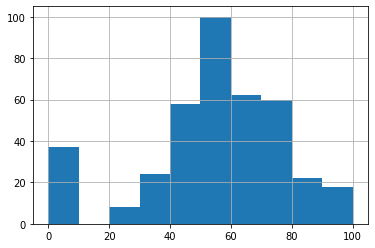

In [207]:
#проведем первичную оценку данных в столбце score (именно анализ данных является нашей целью)
study_math.score.hist()
study_math.score.describe()

In [208]:
#оценим процент нулевых значений в столбце score
len(study_math.score[study_math.score == 0]) / len(study_math.score)

0.09511568123393316

In [209]:
#из гистограммы видно, что при нормальном распределении данных от 20 до 100 в столбце score, есть пул отстоящих нулевых значений
#использована 100-бальная шкала оценки, выбросов более 100% нет
#процент нулевых значений в score менее 10% - можно предположить, что это незаполненные / ошибочные данные. Отделим их от основного датасета
study_math_nullscore = study_math[study_math.score==0] #сохраним отдельно датасет с нулевыми значениями. Возможно, вернемся к нему

In [210]:
study_math = study_math[study_math.score!=0] #сохраним только строки с ненулевыми значениями в столбце score

In [211]:
study_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      352 non-null    object 
 1   sex         352 non-null    object 
 2   age         352 non-null    int64  
 3   address     338 non-null    object 
 4   famsize     328 non-null    object 
 5   Pstatus     311 non-null    object 
 6   Medu        350 non-null    float64
 7   Fedu        331 non-null    float64
 8   Mjob        335 non-null    object 
 9   Fjob        320 non-null    object 
 10  reason      337 non-null    object 
 11  guardian    323 non-null    object 
 12  traveltime  329 non-null    float64
 13  studytime   345 non-null    float64
 14  failures    332 non-null    float64
 15  schoolsup   343 non-null    object 
 16  famsup      316 non-null    object 
 17  paid        316 non-null    object 
 18  activities  340 non-null    object 
 19  nursery     340 non-null    o

In [212]:
#продолжим анализ очищенного датасета: сначала проанализируем числовые признаки
pd.DataFrame(study_math.age.value_counts())#проверим значения в колонке age

,age
16,96
17,90
15,76
18,69
19,16
20,3
22,1
21,1


count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

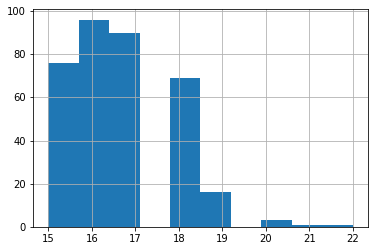

In [213]:
#поскольку пустых / нулевых значений нет - посмотрим на распределение значений
study_math.age.hist()
study_math.age.describe()

In [214]:
#на гистограмме видим пропуски, выбросов за обозначенные границы (15-22) нет, основной массив данных приходится на учеников в возрасти до 18 лет
# можно также проверить возраст в датасете с нулевыми значениями score - возможно, пропущенные возрастные группы именно там
pd.DataFrame(study_math_nullscore.age.value_counts())

,age
18,11
17,8
16,7
15,6
19,5


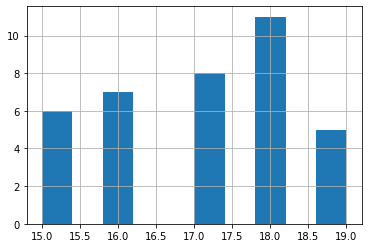

In [215]:
study_math_nullscore.age.hist()

In [216]:
#здесь встречается возрастная группа от 17 до 18 лет, но в целом каких-либо интересных предположений пока не вырисовывается

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


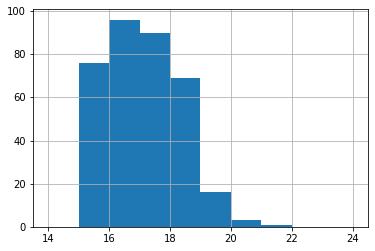

In [217]:
#вернемся к предыдущему датасету (где все значения score заполнены), используем формулу интерквартильного расстояния, чтобы обозначить выбросы
IQR = study_math.age.quantile(0.75) - study_math.age.quantile(0.25)
perc25 = study_math.age.quantile(0.25)
perc75 = study_math.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study_math.age.loc[study_math.age.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 10, range = (14, 24), label = 'IQR')


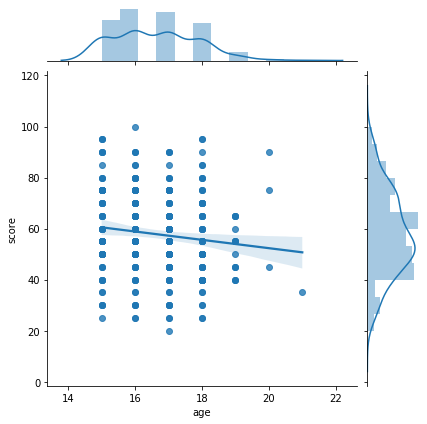

In [278]:
#в данном подходе ученики в возрасте более 21 года попадают в категорию "выросов". 
#посмотрим на график зависимости score от возраста без выбросов
age_clean = study_math[study_math.age <=21]
sns.jointplot(x='age',y='score',data=age_clean, kind='reg')

In [ ]:
#на графики видим снижение успеваемости с увеличением возраста

In [219]:
# проанализируем другие числовые параметры по той же схеме
study_math['Medu'].nunique()
pd.DataFrame(study_math.Medu.value_counts())

,Medu
4.0,125
2.0,88
3.0,87
1.0,47
0.0,3


count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

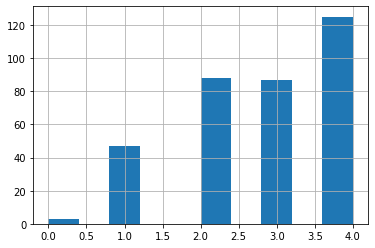

In [220]:
#аномальных значений нет, распределение показывает малую долю матерей без образования или только 1-4 классы (менее 25%), самая значительная доля у матерей с высшим образование
study_math.Medu.hist()
study_math.Medu.describe()

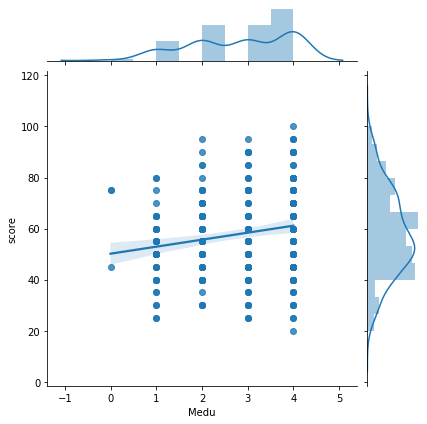

In [279]:
#посмотрим зависимость score от параметра Medu
sns.jointplot(x='Medu',y='score', data=study_math, kind='reg')

In [ ]:
#успеваемость у детей в семьях, где у матери более высокий уровеь образования, лучше

In [221]:
pd.DataFrame(study_math.Fedu.value_counts())

,Fedu
2.0,94
3.0,89
4.0,80
1.0,65
0.0,2
40.0,1


In [222]:
#значение 40 - явно ошибка ввода данных. Возможно, имелось в виду 4, но точно мы не знаем. Лучше очистим от него датасет
study_math = study_math[study_math.Fedu != 40]

In [223]:
pd.DataFrame(study_math.Fedu.value_counts())

,Fedu
2.0,94
3.0,89
4.0,80
1.0,65
0.0,2


count    330.000000
mean       2.545455
std        1.080102
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

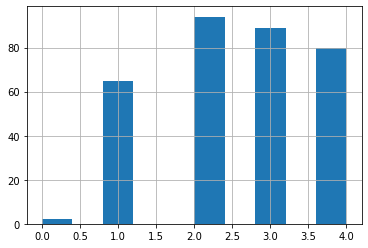

In [224]:
study_math.Fedu.hist()
study_math.Fedu.describe()

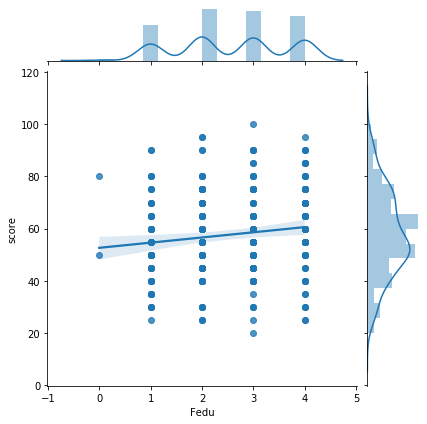

In [281]:
sns.jointplot(x='Fedu', y='score', data=study_math, kind='reg')

In [225]:
#проверим есть ли коррекляция между Fedu & Medu. Если есть, то, оставим только Fedu, где больше заполненных данных
fam_education = study_math[['Fedu','Medu']]
fam_education.corr()

,Fedu,Medu
Fedu,1.00000,0.61139
Medu,0.61139,1.00000


In [226]:
#оставляем оба столбца

count    328.000000
mean       1.423780
std        0.686467
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

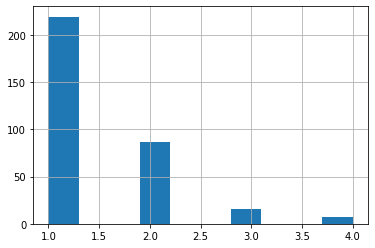

In [227]:
#продолжаем рассматривать числовые параметры
study_math.traveltime.hist()
study_math.traveltime.describe()

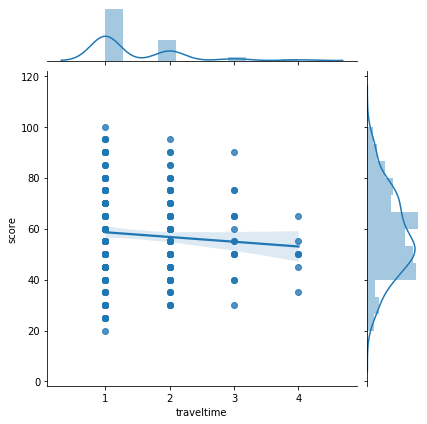

In [282]:
#на гистограмме не видно выбросов, все в рамках обозначенных категорий
#посмотрим на зависимость score от параметра
sns.jointplot(x='traveltime', y='score', data=study_math, kind='reg')

count    344.000000
mean       2.043605
std        0.840564
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

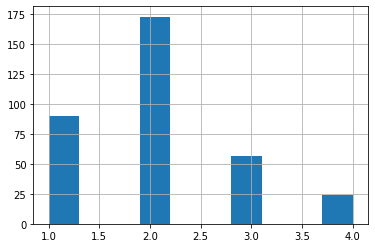

In [229]:
study_math.studytime.hist()
study_math.studytime.describe()

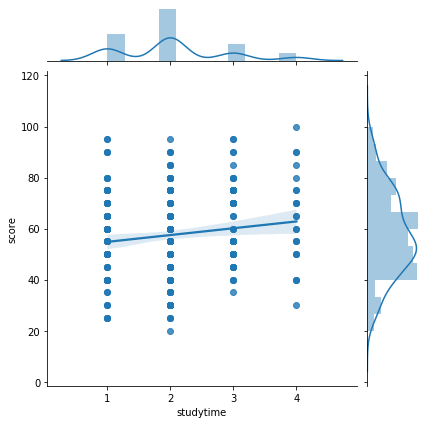

In [283]:
#на гистограмме не видно выбросов, все в рамках обозначенных категорий
#посмотрим на зависимость score
sns.jointplot(x='studytime', y='score', data=study_math, kind='reg')

count    330.000000
mean       0.266667
std        0.662805
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

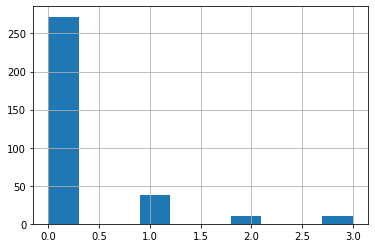

In [286]:
study_math.failures.hist()
study_math.failures.describe()

In [288]:
#достаточно большой пул значений 0, что может означать как отсутсвие внеучебных задач, так и количество задач более 3. Скорее всего, этот показатель не будет информативным (из-за слишком маленькой выборки)

count    327.000000
mean       3.938838
std        0.921417
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

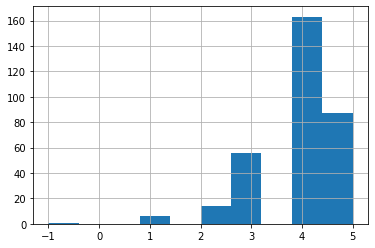

In [233]:
study_math.famrel.hist()
study_math.famrel.describe()

In [234]:
#есть значения вне заданных границ - очистим датафрейм от выбросов
study_math=study_math[study_math.famrel!=-1]

count    342.000000
mean       3.242690
std        1.002719
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

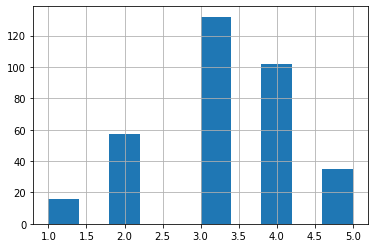

In [235]:
study_math.freetime.hist()
study_math.freetime.describe()

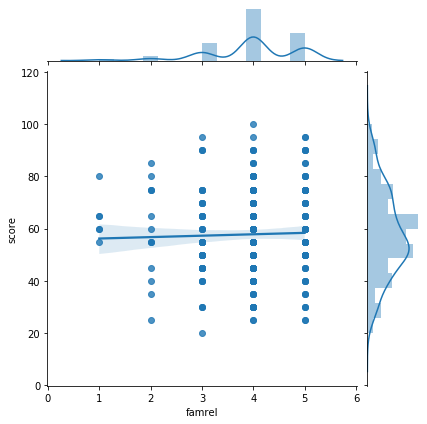

In [289]:
#данные в пределах обозначенных значенийб построим график зависмости score от параметра
sns.jointplot(x='famrel', y='score', data=study_math, kind='reg')

In [ ]:
#на графике видно, что зависимость выражена очень слабо

count    342.000000
mean       3.242690
std        1.002719
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

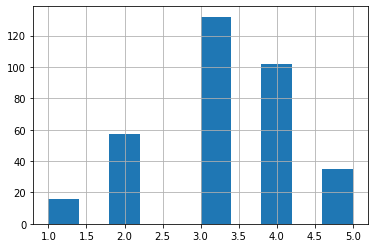

In [291]:
study_math.freetime.hist()
study_math.freetime.describe()

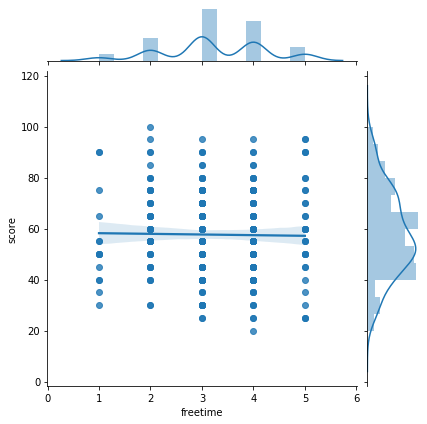

In [292]:
#данные в пределах обозначенных значенийб построим график зависмости score от параметра
sns.jointplot(x='freetime', y='score', data=study_math, kind='reg')

In [ ]:
#видим на графике, что зависимость практически никак не выражена

count    344.000000
mean       3.093023
std        1.092011
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

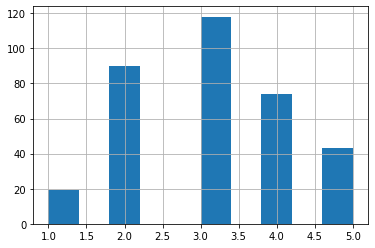

In [237]:
study_math.goout.hist()
study_math.goout.describe()

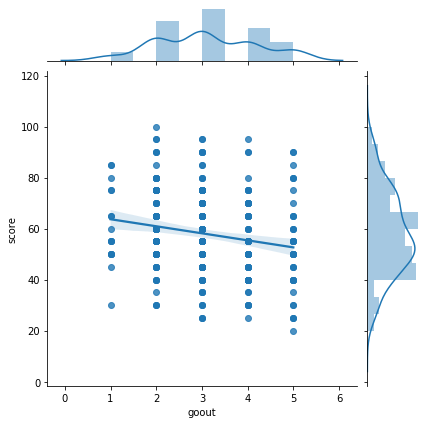

In [290]:
#данные в пределах обозначенных значений, построим график зависимости score
sns.jointplot(x='goout', y='score', data=study_math, kind='reg')

In [ ]:
#на графике хорошо видно, как снижается балл в зависимости от того, сколько времени проводится с друзьями

count    337.000000
mean       3.510386
std        1.414438
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

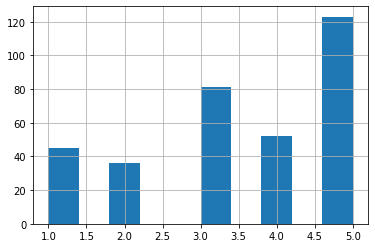

In [239]:
study_math.health.hist()
study_math.health.describe()

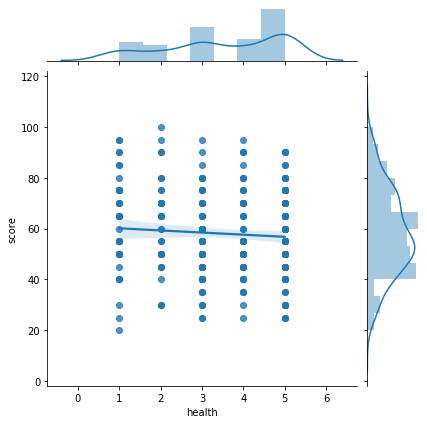

In [293]:
#данные в пределах обозначенных значений
#построим график зависмости score от параметра
sns.jointplot(x='health', y='score', data=study_math, kind='reg')

In [294]:
#зависимость выражена слабо. Интересно, что с улучшением здоровья, оценка снижается, но это может быть объяснено тем, что выборка по здоровью "очень плохо" гораздо меньше

count    340.000000
mean       8.085294
std       24.774292
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

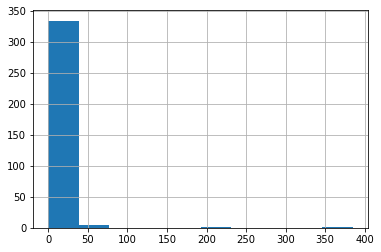

In [241]:
study_math.absences.hist()
study_math.absences.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 2.0,  Границы выбросов: [-1.0, 11.0].


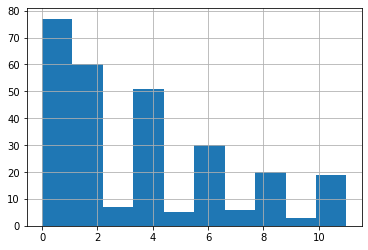

In [242]:
#основное распределение в пределах 8, но есть выбросы. Воспользуемся межквартильным расстоянием, чтобы определить выбросы
QR = study_math.absences.quantile(0.75) - study_math.absences.quantile(0.25)
perc25 = study_math.absences.quantile(0.25)
perc75 = study_math.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study_math.absences.loc[study_math.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 10)

In [249]:
#посмотрим, сколько строк в датафрейме вне границ по absences

frequent_absence = study_math[study_math.absences>perc75 + 1.5*IQR]

In [250]:
frequent_absence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 18 to 390
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      62 non-null     object 
 1   sex         62 non-null     object 
 2   age         62 non-null     int64  
 3   address     61 non-null     object 
 4   famsize     57 non-null     object 
 5   Pstatus     56 non-null     object 
 6   Medu        62 non-null     float64
 7   Fedu        58 non-null     float64
 8   Mjob        58 non-null     object 
 9   Fjob        55 non-null     object 
 10  reason      59 non-null     object 
 11  guardian    60 non-null     object 
 12  traveltime  59 non-null     float64
 13  studytime   61 non-null     float64
 14  failures    58 non-null     float64
 15  schoolsup   59 non-null     object 
 16  famsup      53 non-null     object 
 17  paid        55 non-null     object 
 18  activities  61 non-null     object 
 19  nursery     59 non-null     o

In [251]:
#если убрать строки с выбросами по пропускам, то датафрейм сильно сократится. Попробуем оценить, насколько разумно "вычищать"эти данные
study_math_normabsence = study_math[study_math.absences<=perc75 + 1.5*IQR]
study_math_normabsence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      278 non-null    object 
 1   sex         278 non-null    object 
 2   age         278 non-null    int64  
 3   address     266 non-null    object 
 4   famsize     262 non-null    object 
 5   Pstatus     247 non-null    object 
 6   Medu        276 non-null    float64
 7   Fedu        261 non-null    float64
 8   Mjob        266 non-null    object 
 9   Fjob        254 non-null    object 
 10  reason      266 non-null    object 
 11  guardian    251 non-null    object 
 12  traveltime  258 non-null    float64
 13  studytime   274 non-null    float64
 14  failures    262 non-null    float64
 15  schoolsup   272 non-null    object 
 16  famsup      251 non-null    object 
 17  paid        250 non-null    object 
 18  activities  267 non-null    object 
 19  nursery     269 non-null    o

In [252]:
frequent_absence.score.median()

50.0

In [254]:
frequent_absence.score.max()

90.0

In [255]:
study_math_normabsence.score.median()

55.0

In [256]:
study_math.score.median()

55.0

In [257]:
#медианное значение score в "вычищенных" от частых пропусков данных и первичном датафрейме одинаковое. 
#Поскольку часто пропускающие занятия при общей оценке не дают сильного искажения данных по score, 
#предлагается оставить их в общем анализе

In [258]:
#Посмотрим на корреклцию между числовыми параметрами.
study_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.127411,-0.126262,0.104695,-0.009031,0.241688,0.074120,-0.001622,0.119106,-0.053539,0.112659,-0.133221
Medu,-0.127411,1.000000,0.610995,-0.163279,0.070684,-0.203566,-0.011290,0.015757,0.076565,-0.034962,-0.027265,0.185018
Fedu,-0.126262,0.610995,1.000000,-0.157956,-0.017564,-0.266833,-0.027716,-0.027575,0.046972,0.019059,0.018657,0.133649
traveltime,0.104695,-0.163279,-0.157956,1.000000,-0.113372,0.102060,-0.046098,-0.016865,0.034903,-0.000732,-0.046328,-0.079383
studytime,-0.009031,0.070684,-0.017564,-0.113372,1.000000,-0.147170,0.041233,-0.130168,-0.030210,-0.083250,-0.028882,0.138439
failures,0.241688,-0.203566,-0.266833,0.102060,-0.147170,1.000000,0.036912,0.137938,0.135307,0.056515,0.088440,-0.284212
famrel,0.074120,-0.011290,-0.027716,-0.046098,0.041233,0.036912,1.000000,0.154119,0.039546,0.119492,-0.089372,0.029613
freetime,-0.001622,0.015757,-0.027575,-0.016865,-0.130168,0.137938,0.154119,1.000000,0.291143,0.078495,0.008120,-0.015933
goout,0.119106,0.076565,0.046972,0.034903,-0.030210,0.135307,0.039546,0.291143,1.000000,-0.006226,-0.050565,-0.185977
health,-0.053539,-0.034962,0.019059,-0.000732,-0.083250,0.056515,0.119492,0.078495,-0.006226,1.000000,-0.014898,-0.072289


In [268]:
#какой-либо сильной корреляции со score нет ни у одного параметра. 
#Между собой параметры также не находятся в корреляции хотя бы более 0.5
#Перейдем к анализу номинативных значений. 
#Включим в анализ также категориальные параметры которые уже проанализировали как числовые

In [297]:
#сначала проанализируем количество уникальных значений в колонках номинативных параметров
study_math.address.nunique()


2

In [273]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=study_math.loc[study_math.loc[:, column].isin(study_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

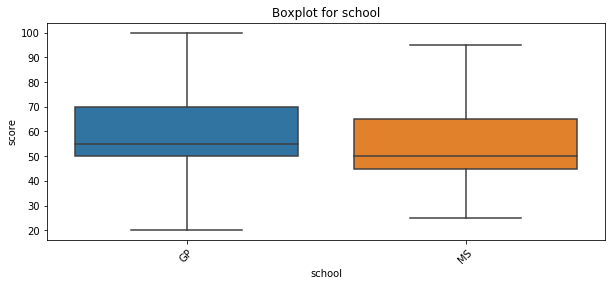

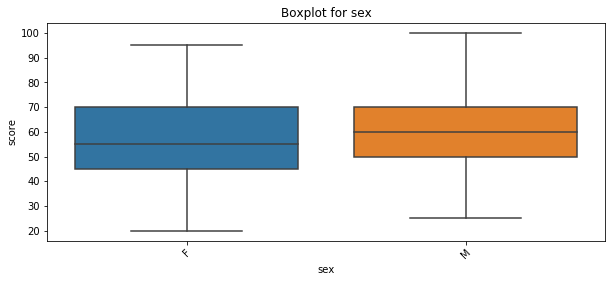

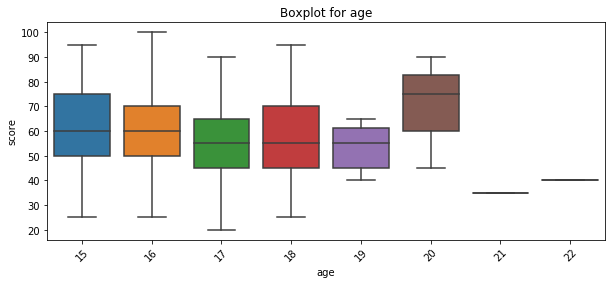

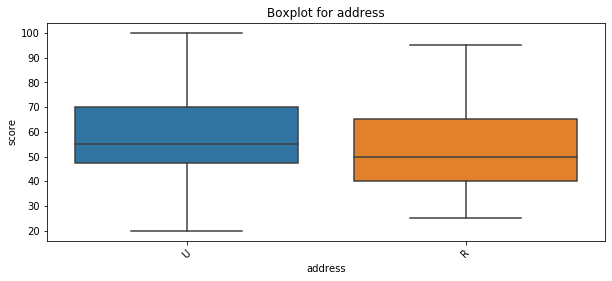

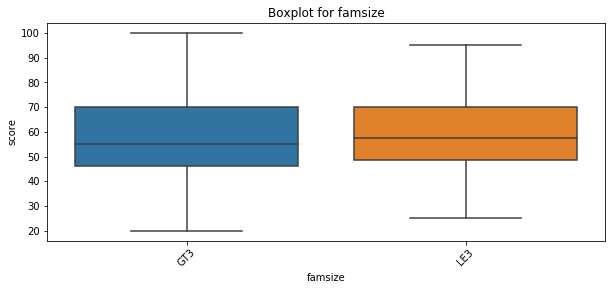

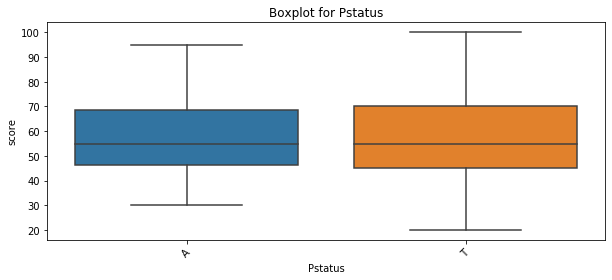

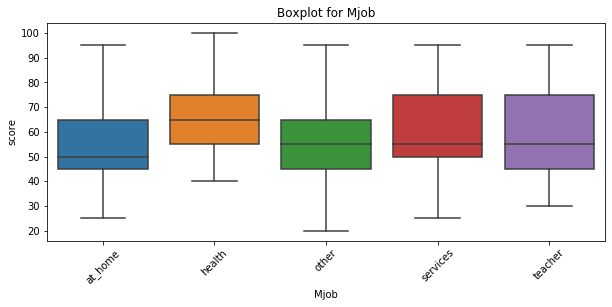

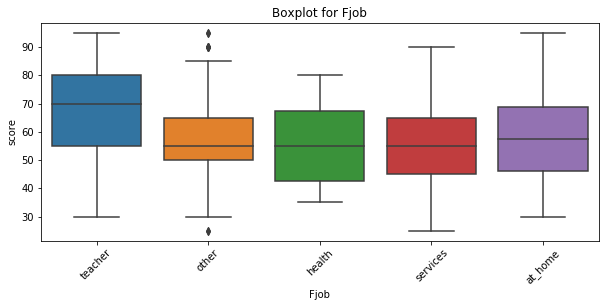

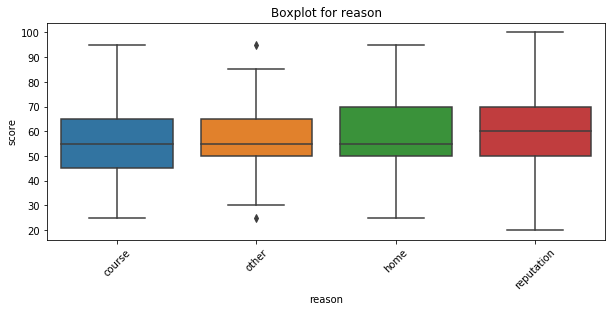

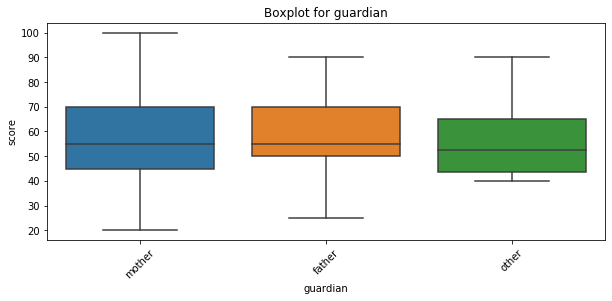

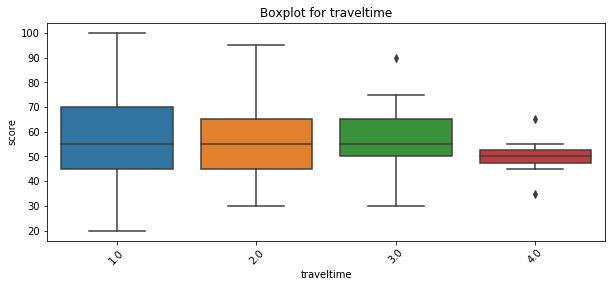

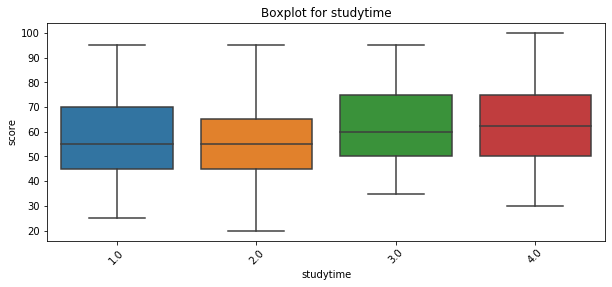

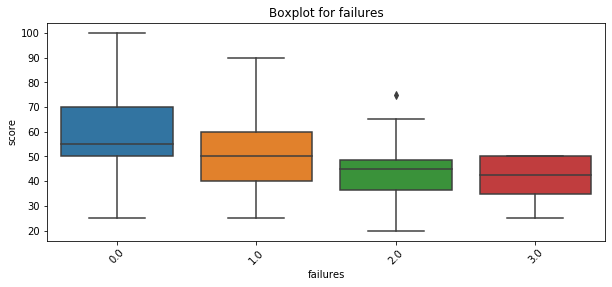

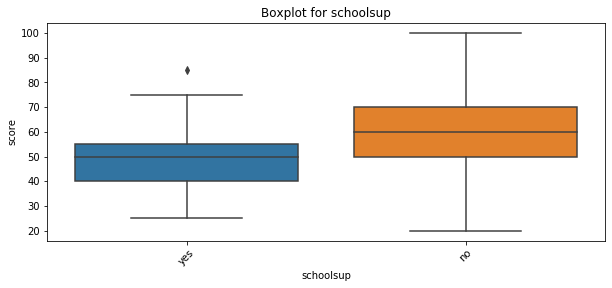

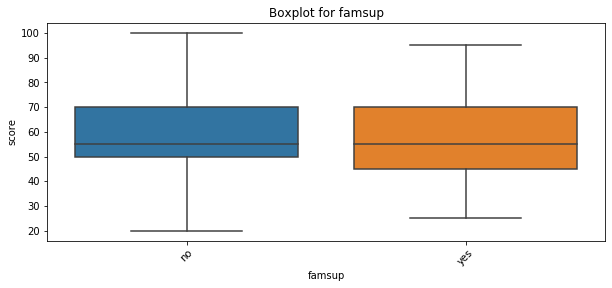

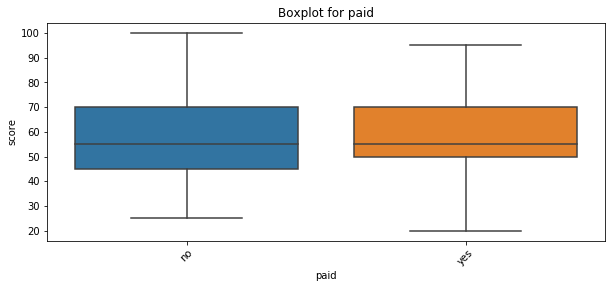

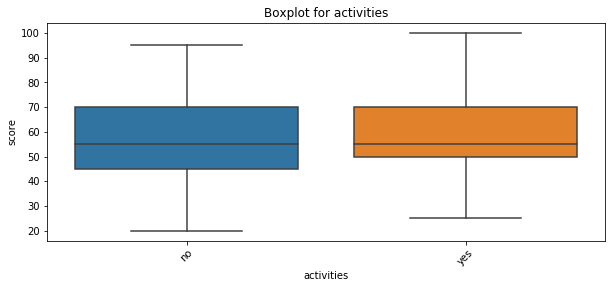

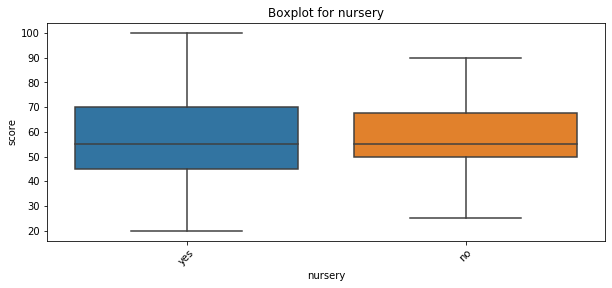

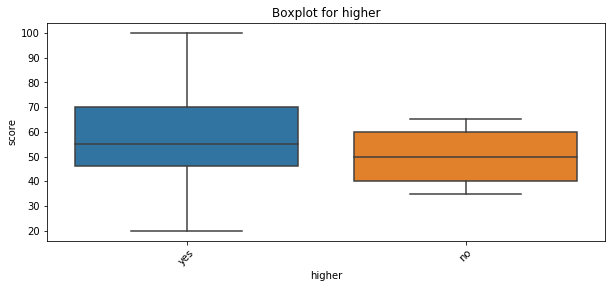

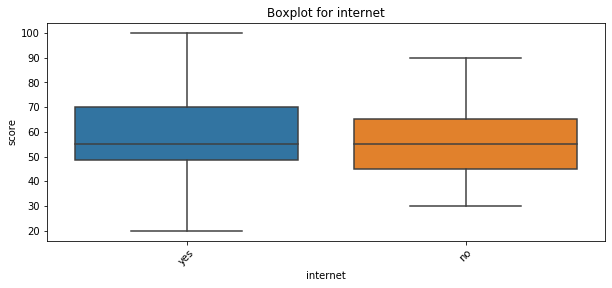

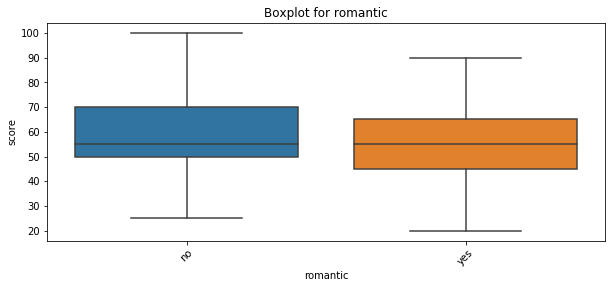

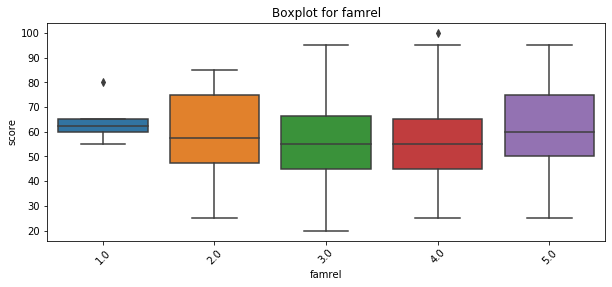

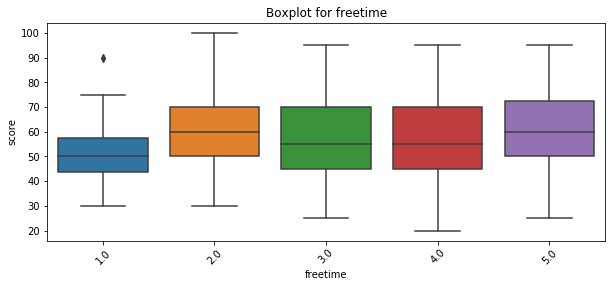

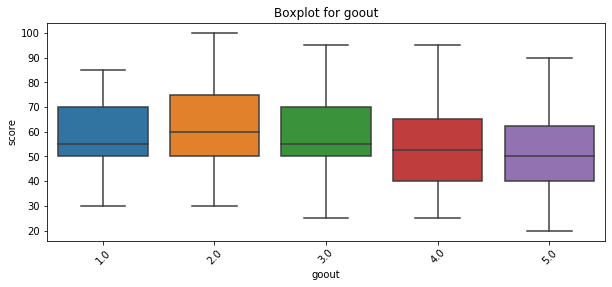

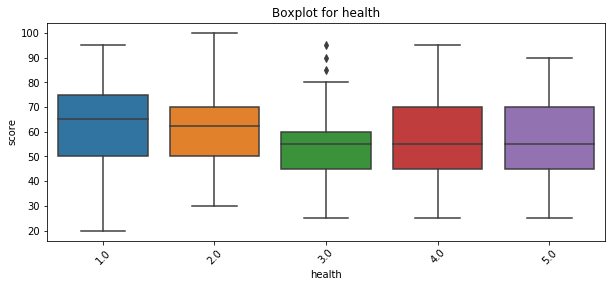

In [298]:
for col in ['school', 'sex', 'age', 'address','famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','health']:
    get_boxplot(col)

первичные выводы по графикам:
1. В среднем успеваемость в школе GP лучше, чем в MS
2. Успеваемость у мальчиков лучше
3. Влияние размера семьи а успеваемость не отмечена на графике
4. Статус совместного жилья родителей так же не влияет на успеваемость (исходя из графика)
5. Профессия матери, скорее всего, оказывает влияние на успеваемость (успеваемость детей, где сфера занятости матери - здравоохранение, заметно выше остальных, у домохозяек - ниже)
6. Профессия отца также оказывает влияние на успеваемость (у учителей дети получают оценки лучше)
7. Причина выбора школы может оказывать влияние на успеваемость - у тех, кто ориентируется на репутацию школы, успеваемость выше
8. Опекун, если это не мать или отец, может негативно сказываться на успеваемости
9. время до школы в пределах часа, скорее, не оказывает влияния на успеваемость. Если это более часа - успеваемость снижается, но и количество учеников гораздо меньше, чем в остальных группах
10. Время обучения может оказывать влияние на оценки
11. По графику количество внеучебных неудач негативно влияет на успеваемость, но как было отмечено ранее, слишком большой пул учеников с параметром 0 (который может обозначать,как отсутсвие неудач, так и >3 неудач)
12. Отсутвие дополнительной учебной поддержки положительно влияет на оценки
13. Семейная образовательная поддержка скорее негативно влияет на успеваемость - больший % оценок ниже среднего значения в выборке
14. дополнительные платные занятия сокращают количество учеников  с оценкой ниже медианы, но есть выбросы, так что в среднем оценки те же, что и у учеников без платных занятий
15. Городские ученики учаться лучше
16. У учеников, которые хотят получить высшее образование, успеваемость лучше



In [307]:
#проведем также тест Стьюдента
def get_stat_dif(column):
    cols = study_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study_math.loc[study_math.loc[:, column] == comb[0], 'score'], 
                        study_math.loc[study_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [308]:
for col in ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','health','absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
